# Analyze Results of Random Walk
## 2019 - 2023 for September 11, 2001 Attacks

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from functools import reduce

# pd.set_option('display.float_format', '{:e}'.format)

In [133]:
def read_and_rename_csv(file_path):
    """
    Reads random walk files from disk and properly names index column
    :param file_path: Path to file.
    :type file_path: str
    :return: Processed dataframe.
    :rtype: pandas Dataframe
    """
    df = pd.read_csv(file_path)
    df.rename(columns={"Unnamed: 0": "index"}, inplace=True)
    df["eig_cent_scaled"] = df["eig_cent"] * 1000000
    return df

def merge_dataframes(df_dict):
    """
    Merges dictionary of Dataframes into a single Dataframe, based on page (outer join).
    :param df_dict: Dictionary of dataframes
    :type df_dict: dict
    :return: Merged Dataframe
    :rtype: pandas Dataframe
    """
    return reduce(lambda left, right: pd.merge(left, right, on="page", how="outer"), df_dict.values())

def create_top_month_dict(top_dict, year):
    """
    Accepts a dictionary containing Dataframes with a subset of top eigenvector centrality pages in a month of clickstream data and adds a column for the month filled with 1, indicating the presence of that page in that month. This is preparation for creating a yearly heatmap with the presence of pages over months.
    :param top_dict: Dictionary of Dataframes with pages of top eigenvector centrality for a year.
    :type top_dict: dict
    :param year: The year in which the data was observed.
    :type year: str
    :return: Dictionary of enhanced Dataframes with pages of top eigenvector centrality for a year.
    :rtype: dict
    """
    top_month_dict = {}
    for month in range(1, 13):
        key = f"top_sept11_{year}{month:02d}"
        data = top_dict.get(key, {})
        month_df = pd.DataFrame({"page": data.get("page", []), f"{month:02d}": 1})
        top_month_dict[f"month_{month:02d}"] = month_df
    return top_month_dict

sept11_months = dict()
top_2019 = dict()

for month in range(1, 13):
    file_path = f"../output/random_walks/not_uniform_prob/2019-{month:02d}_sept11_~uniform.csv"
    df = read_and_rename_csv(file_path)
    sept11_months[f"sept11_2019{month:02d}"] = df

for k, df in sept11_months.items():
    top = df.nlargest(5, "eig_cent")
    top_2019[f"top_{k}"] = top


In [134]:
sept11_201901 = pd.read_csv("../output/random_walks/not_uniform_prob/2019-01_sept11_~uniform.csv")
sept11_201901.rename(columns={"Unnamed: 0": "index"}, inplace=True)

sept11_201902 = pd.read_csv("../output/random_walks/not_uniform_prob/2019-02_sept11_~uniform.csv")
sept11_201902.rename(columns={"Unnamed: 0": "index"}, inplace=True)

In [135]:
sept11_201901.head()

,index,page,eig_cent
0,0,Permian,0.000004
1,1,Thunder_and_Lightning_(album),0.000004
2,2,Daisy_chain_(electrical_engineering),0.000004
3,3,Corregidor,0.000004
4,4,Baleen,0.000004


In [136]:
sept11_201901.tail()

,index,page,eig_cent
242908,242908,RSS,0.000004
242909,242909,The_Big_Snooze,0.000004
242910,242910,Hudson_Taylor,0.000004
242911,242911,Exclusive_economic_zone_of_Japan,0.000004
242912,242912,Mustelidae,0.000004


In [137]:
sept11_201901["eig_cent_scaled"] = sept11_201901["eig_cent"] * 1000000
sept11_201901.head()

,index,page,eig_cent,eig_cent_scaled
0,0,Permian,0.000004,4.1167
1,1,Thunder_and_Lightning_(album),0.000004,4.1167
2,2,Daisy_chain_(electrical_engineering),0.000004,4.1167
3,3,Corregidor,0.000004,4.1167
4,4,Baleen,0.000004,4.1167


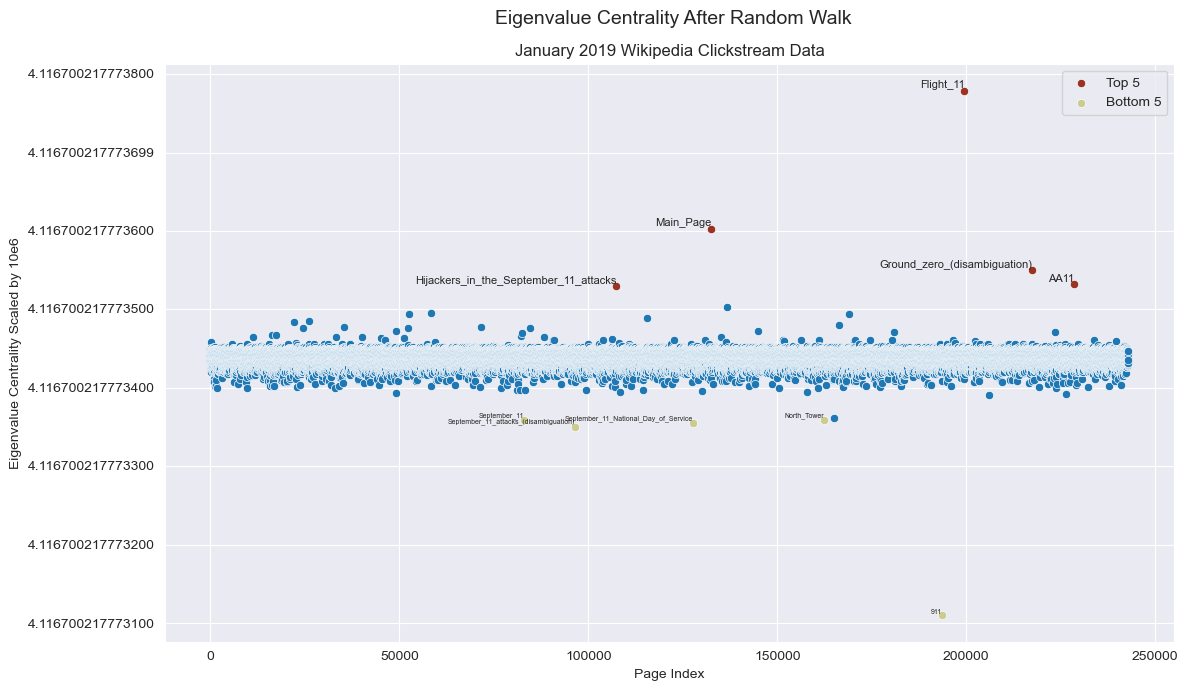

In [138]:
plt.figure(figsize=(12, 7))

sns.scatterplot(sept11_201901, x="index", y="eig_cent_scaled")


# Get top
top_5 = sept11_201901.nlargest(5, "eig_cent_scaled")
bottom_5 = sept11_201901.nsmallest(5, "eig_cent_scaled")

# Add labels
for idx, row in top_5.iterrows():
    plt.text(row["index"], row["eig_cent_scaled"], f"{row['page']}", ha="right", va="bottom", fontsize=8)

for idx, row in bottom_5.iterrows():
    plt.text(row["index"], row["eig_cent_scaled"], f"{row['page']}", ha="right", va="bottom", fontsize=5)
    
# Add colors
top_mask = sept11_201901['index'].isin(top_5['index'])
bottom_mask = sept11_201901['index'].isin(bottom_5['index'])
sns.scatterplot(x="index", y="eig_cent_scaled", data=sept11_201901[top_mask], color='#9a3324', label='Top 5')
sns.scatterplot(x="index", y="eig_cent_scaled", data=sept11_201901[bottom_mask], color='#cbcc8d', label='Bottom 5')

plt.grid(True, which="both")
decimal_places = 15  # Adjust as needed
plt.gca().yaxis.set_major_formatter(FormatStrFormatter(f"%.{decimal_places}f"))
plt.legend()
plt.ylabel("Eigenvalue Centrality Scaled by 10e6")
plt.xlabel("Page Index")
plt.suptitle("Eigenvalue Centrality After Random Walk", x=0.565, fontsize=14)
plt.title("January 2019 Wikipedia Clickstream Data")
plt.tight_layout()
plt.savefig("../output/plots/201901_eigs.png", format="png")
plt.show()

In [139]:
sept11_201901.sort_values(by="eig_cent", ascending=False)

,index,page,eig_cent,eig_cent_scaled
199507,199507,Flight_11,0.000004,4.1167
132525,132525,Main_Page,0.000004,4.1167
217500,217500,Ground_zero_(disambiguation),0.000004,4.1167
228555,228555,AA11,0.000004,4.1167
107368,107368,Hijackers_in_the_September_11_attacks,0.000004,4.1167
...,...,...,...,...
162382,162382,North_Tower,0.000004,4.1167
82915,82915,September_11,0.000004,4.1167
127689,127689,September_11_National_Day_of_Service,0.000004,4.1167
96519,96519,September_11_attacks_(disambiguation),0.000004,4.1167


In [140]:
sept11_201901["eig_cent"].min()

4.116700217773111e-06

In [141]:
sept11_201901["eig_cent"].max()

4.116700217773778e-06

## Create Heatmap

In [142]:
top_2019.keys()

dict_keys(['top_sept11_201901', 'top_sept11_201902', 'top_sept11_201903', 'top_sept11_201904', 'top_sept11_201905', 'top_sept11_201906', 'top_sept11_201907', 'top_sept11_201908', 'top_sept11_201909', 'top_sept11_201910', 'top_sept11_201911', 'top_sept11_201912'])

In [143]:
top_2019.get("top_sept11_201901")

,index,page,eig_cent,eig_cent_scaled
199507,199507,Flight_11,0.000004,4.1167
132525,132525,Main_Page,0.000004,4.1167
217500,217500,Ground_zero_(disambiguation),0.000004,4.1167
228555,228555,AA11,0.000004,4.1167
107368,107368,Hijackers_in_the_September_11_attacks,0.000004,4.1167


In [144]:
# jan2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201901")["page"], "jan": 1})
# feb2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201902")["page"], "feb": 1})
# mar2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201903")["page"], "mar": 1})
# apr2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201904")["page"], "apr": 1})
# may2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201905")["page"], "may": 1})
# jun2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201906")["page"], "jun": 1})
# jul2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201907")["page"], "jul": 1})
# aug2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201908")["page"], "aug": 1})
# sep2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201909")["page"], "sep": 1})
# oct2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201910")["page"], "oct": 1})
# nov2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201911")["page"], "nov": 1})
# dec2019 = pd.DataFrame({"page": top_2019.get("top_sept11_201912")["page"], "dec": 1})
# 
# top_month_list = []
# top_month_list.extend([jan2019, feb2019, mar2019, apr2019, may2019, jun2019, jul2019, aug2019, sep2019, oct2019, nov2019, dec2019])



In [145]:
top_month_dict = create_top_month_dict(top_2019, "2019")

In [146]:
combine_top2019 = merge_dataframes(top_month_dict)
combine_top2019

,page,01,02,03,04,05,06,07,08,09,10,11,12
0,Flight_11,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN
1,Main_Page,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,Ground_zero_(disambiguation),1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AA11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hijackers_in_the_September_11_attacks,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,911,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0
6,September_11,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,List_of_terrorist_incidents_in_2001,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,List_of_the_deadliest_firefighter_disasters_in...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Judgment_Day_(2001),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


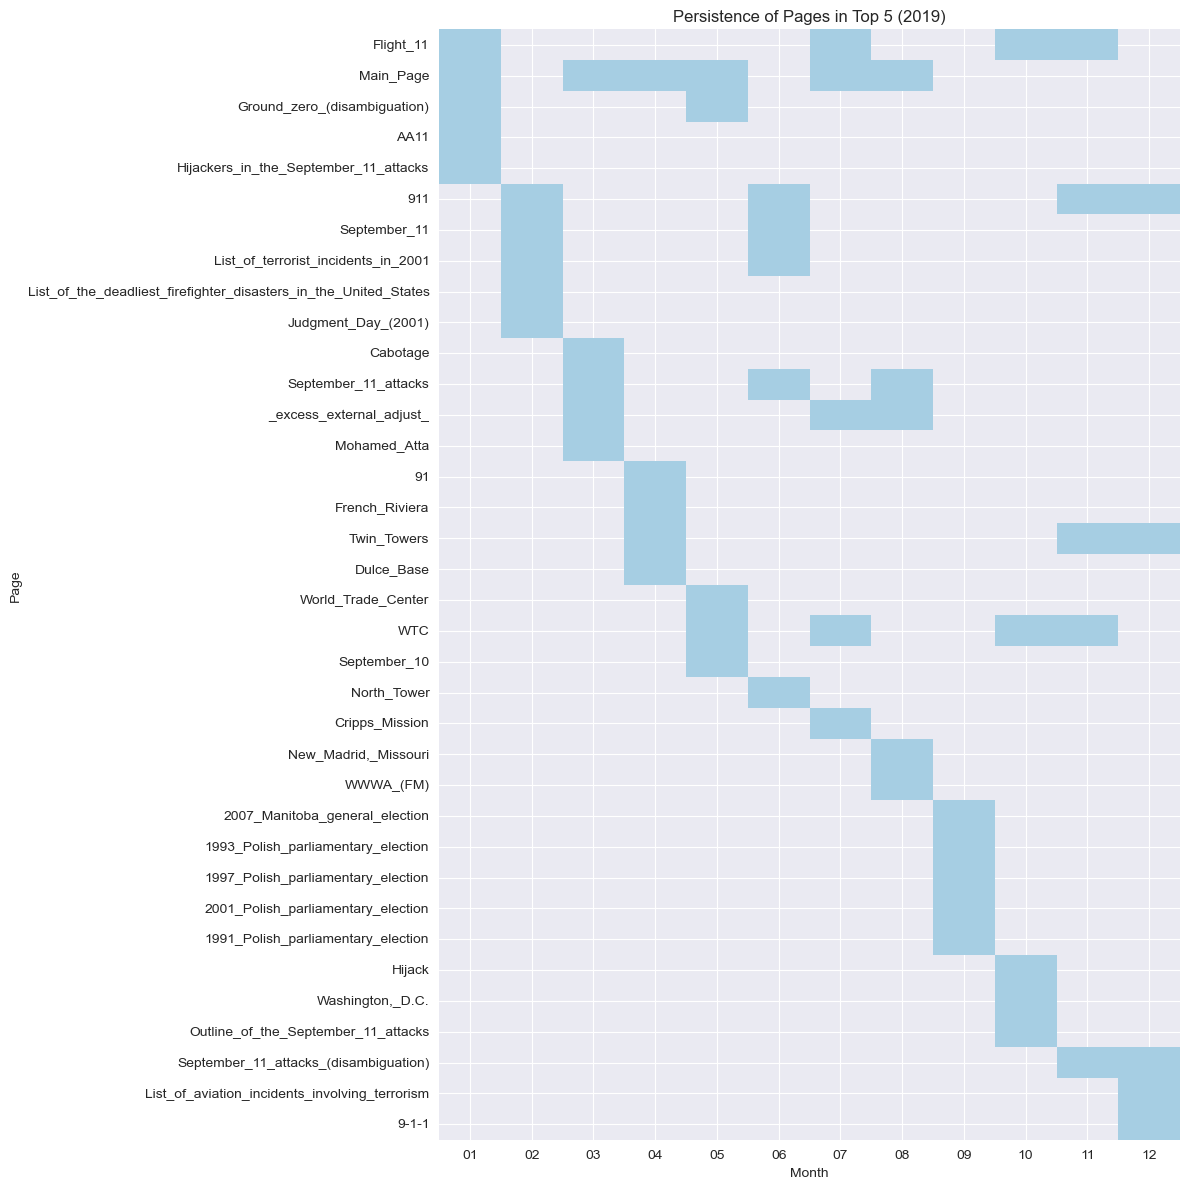

In [147]:
plt.figure(figsize=(12, 12))
sns.heatmap(combine_top2019.set_index("page"), cmap="Paired", cbar=False,)
plt.title("Persistence of Pages in Top 5 (2019)")
plt.xlabel("Month")
plt.ylabel("Page")
plt.tight_layout()
plt.savefig("../output/plots/2019_persist.pdf", format="pdf")
plt.show()